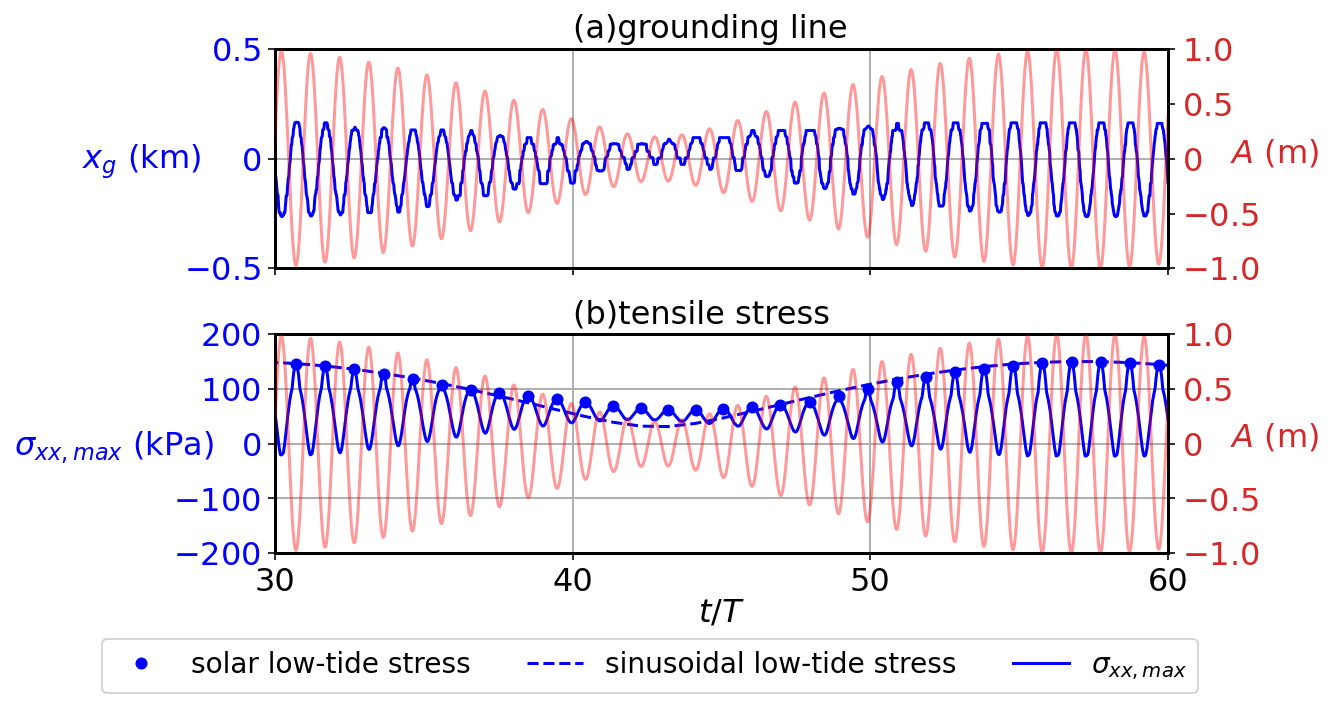

In [1]:
#======================= import essential libraries ===========================
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib.ticker as ticker
from scipy.signal import find_peaks
import matplotlib.ticker as ticker
import scipy.stats as st
#======================= input parameters ===========================
Hght = 500                   # Height(m)
Lngth = 2e4                  # Lngth(m)               
tol = 1e-3                   # Tolerance(m)
T = 0.5*3.154e7/(12.0*30.0)  # solar tide period
sea_level = Hght*0.917       # sea level(m)
r_lake = 0.5e3               # range of lake (m)

fs = 16                  # FontSize
marker = 6               # MarkerType

#======================= functions  ===========================

def sigma_diurnal(A):
    return z1[1]+z1[0]*A
def neap_spring_tide(t):
    return 1.0/2.498*np.sin(2.0*np.pi*t/(0.5*3.154e7/12.0/30.0))\
            +1.5/2.498*1.0*np.sin(2.0*np.pi*t*12.42/12/(0.5*3.154e7/12.0/30.0))

# ================================ sigma - A ====================================
sigma = []
sigma_net = []
vtide=[0,0.2,0.4,0.6,0.8,0.9,1.0]
vfile = ['../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_00',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_20',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_40',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_60',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_80',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide0_90',\
        '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00']

for file in vfile:
    # read in the max stress file
    max_tension_net   = np.loadtxt(file+"/max_tension_net.txt", dtype='f', delimiter=' ')
    max_tension   = np.loadtxt(file+"/max_tension.txt", dtype='f', delimiter=' ')
    sigma.append(max(max_tension))
    sigma_net.append(max(max_tension_net))

sigma=np.array(sigma)
sigma_net=np.array(sigma_net)
vtide=[0,0.2,0.4,0.6,0.8,0.9,1.0]
z1 = st.linregress(vtide, sigma_net/1e3)

#======================= read the data ===========================
file = '../results/stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_modtide1_00'

X = np.loadtxt(file+ "/line_plot_data/X.txt", dtype='f', delimiter=' ')
t = np.loadtxt(file+ "/line_plot_data/t.txt", dtype='f', delimiter=' ')
x_left = np.loadtxt(file+ "/line_plot_data/x_left.txt", dtype='f', delimiter=' ')
x_right = np.loadtxt(file+ "/line_plot_data/x_right.txt", dtype='f', delimiter=' ')
s_mean = np.loadtxt(file+ "/line_plot_data/s_mean.txt", dtype='f', delimiter=' ')

max_tension_t = np.loadtxt( file +'/max_tension_t.txt', dtype='f', delimiter=',')
max_tension_net = np.loadtxt(file +'/max_tension_net.txt', dtype='f', delimiter=',')   
max_tension = np.loadtxt(file +'/max_tension.txt', dtype='f', delimiter=',')   
max_tension_x = np.loadtxt(file +'/max_tension_x.txt', dtype='f', delimiter=',')

from scipy.signal import find_peaks
import matplotlib.ticker as ticker

def sigma_diurnal(A):
    return z1[1]+z1[0]*A
def neap_spring_tide(t):
    return 1.0/2.498*np.sin(2.0*np.pi*t/(0.5*3.154e7/12.0/30.0))\
            +1.5/2.498*1.0*np.sin(2.0*np.pi*t*12.42/12/(0.5*3.154e7/12.0/30.0))
# ================================ figure ====================================
fig,ax = plt.subplots(figsize=(8,7*2/3))
peaks, _ = find_peaks(x_left,height=(-0, 2e5))
plt.rcParams["figure.dpi"] = 600
plt.setp(ax.spines.values(), linewidth=2)
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays
tinit=30
# ================================ panel a ====================================
ax =plt.subplot(211)
ax.plot(t/T,x_left/1e3-x_left.mean()/1e3,color='b', linewidth=1.5)
ax.set_ylabel(r'$x_g$ (km)',fontsize=fs, rotation=0, color='b',math_fontfamily='dejavusans')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.15, 0.40)
ax.set_ylim([-.5,.5])
plt.yticks([-0.5,0,0.5],[r'$-0.5$',r'$0$',r'$0.5$'],fontsize=fs,color='b',math_fontfamily='dejavusans')

ax.set_xlim([tinit,60])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10.0))
ax.set_xlabel(r'$t/T$',fontsize=fs, rotation=0, visible=False) 
ax.grid(True,linewidth=1)
ax.set_xticklabels([])

axr = ax.twinx()
tide_peaks, _ = find_peaks(-neap_spring_tide(t),height=(0, 1e5))
plt.plot((t/T),neap_spring_tide(t),color='r',linewidth =1.5,alpha=0.4)
axr.set_ylabel(r'$A$ (m)',color='#D62728',fontsize=fs, rotation=0,alpha=1.0,math_fontfamily='dejavusans')
axr.yaxis.set_label_coords(1.12, 0.60)
axr.set_ylim([-1.0,1.0])
plt.yticks([-1.0,-0.5,0,0.5,1.0],[r'$-1.0$',r'$-0.5$',r'$0$',r'$0.5$',r'$1.0$'],fontsize=fs,color='#D62728',math_fontfamily='dejavusans')
plt.setp(ax.spines.values(), linewidth=1.5)
plt.annotate('(a)grounding line',xy=(40,1.1),fontsize=fs,math_fontfamily='dejavusans',annotation_clip=False)

# ================================ panel b ====================================
ax = plt.subplot(212)
peaks, _ = find_peaks(max_tension_net,height=(-0, 2e5),width=5)
# new_peaks = []
# for i, ip in enumerate(peaks):
#     if max_tension_net[ip]/1e3 > 50:
#         new_peaks.append(ip)
# peaks = np.array(new_peaks)
ax.plot(max_tension_t[peaks],max_tension_net[peaks]/1e3,color='b',linestyle='-',linewidth=0.0,marker='o',markersize=5,label=r'solar low-tide stress')
ax.plot(max_tension_t[tide_peaks],sigma_diurnal(neap_spring_tide(-t[tide_peaks])),color='b',linestyle='--',linewidth=1.5,label=r'sinusoidal low-tide stress')

ax.plot(max_tension_t,max_tension_net/1e3,color='b',alpha=1,linewidth=1.5,label=r'$\sigma_{xx,max}$')
plt.yticks([-2e2,-100,0,1e2,2e2],[r'$-200$',r'$-100$',r'$0$',r'$100$',r'$200$'],fontsize=fs,color='b',math_fontfamily='dejavusans')
ax.set_ylabel(r'$\sigma_{xx,max}$ (kPa)',fontsize=fs, rotation=0, color='b',math_fontfamily='dejavusans')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.yaxis.set_label_coords(-0.18, 0.40)
ax.set_ylim([-2e2,2e2])

ax.set_xlim([tinit,60])
ax.set_xlabel(r'$t/T$',fontsize=fs, rotation=0) 
plt.xticks(fontsize=fs,color='k',math_fontfamily='dejavusans')
ax.xaxis.set_label_coords(0.5, -0.20)
ax.grid(True,linewidth=1)


axr = ax.twinx()
tide_peaks, _ = find_peaks(neap_spring_tide(t),height=(0, 1e5))

plt.plot(t/T,neap_spring_tide(t),color='r',linewidth =1.5,alpha=0.4)
axr.set_ylabel(r'$A$ (m)',color='#D62728',fontsize=fs, rotation=0)
axr.yaxis.set_label_coords(1.12, 0.60)
axr.set_ylim([-1.0,1.0])
plt.yticks([-1.0,-0.5,0,0.5,1.0],[r'$-1.0$',r'$-0.5$',r'$0$',r'$0.5$',r'$1.0$'],fontsize=fs,color='#D62728',math_fontfamily='dejavusans')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10.0))
plt.annotate('(b)tensile stress',xy=(40,1.1),fontsize=fs,math_fontfamily='dejavusans',annotation_clip=False)
plt.subplots_adjust(left=None, bottom=0.05, right=None, top=0.8, wspace=None, hspace=0.3)

lgd = ax.legend(bbox_to_anchor=(1.05, -0.7),fontsize=fs-2,loc=4,ncol=3)

plt.setp(ax.spines.values(),linewidth=1.5)

plt.savefig('../figures/figure_3.jpeg',bbox_inches='tight',dpi=600)
# plt.savefig('../figures/figure_3(high-resolution).tiff',bbox_inches='tight',dpi=600)
